In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Nikhil's working path
%cd drive/My\ Drive/'Captstone(297)'/data
# Selina's working path
# %cd drive/My\ Drive/2020_Fall/'Captstone(297)'/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1auWpfpINZvmJbl0I50kYmpS29bbnesqp/Captstone(297)/data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

## RF Setup

In [3]:
# LOAD IN CO_OCCURRENCE TRAINING DATA
positive_pairs_df = pd.read_pickle("positive_pairs_3fix_wdups.pkl")
negative_pairs_df = pd.read_pickle('negative_pairs_3fix_wdups.pkl')

# positive_pairs_df = pd.read_pickle("positive_3pairs_full_wdups.pkl")
# negative_pairs_df = pd.read_pickle('negative_3pairs_full_wdups.pkl')

# positive_pairs_df = pd.read_pickle("positive_pairs_full.pkl")
# negative_pairs_df = pd.read_pickle('negative_pairs_full.pkl')

In [4]:
# Concatenate positive/negative pairs into one df

positive_pairs_df_temp = positive_pairs_df.copy()
positive_pairs_df_temp['y'] = 1

negative_pairs_df_temp = negative_pairs_df.copy()
negative_pairs_df_temp['y'] = 0

all_data = pd.concat([positive_pairs_df_temp,negative_pairs_df_temp],axis=0)

In [5]:
all_data.shape

(163168, 158)

In [6]:
# Do a train test split stratified on anchor (here temporality doesnt make sense)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(['anchor','positive','negative','y'],axis=1), all_data['y'], test_size=0.2, random_state=297,
                                                    stratify=all_data['anchor'])

## Random Forest

### Hyperparameter Tuning

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 1000],
#     'max_depth': [20, 40, 60, 80, 100, 120],
#     'min_samples_split': [2, 5, 10, 15, 100],
#     'min_samples_leaf': [1, 2, 5, 10]   
# }

# param_grid = {
#     'n_estimators': [50, 100, 300],    #best = 100
#     'max_depth': [40, 100],  # best=40
#     'min_samples_split': [5, 15, 100],  #best = 15
#     'min_samples_leaf': [1, 5, 10]   #best = 1
# }

param_grid = {
    'n_estimators': [80, 100, 120, 140],
    'max_depth': [20, 30, 40, 50],
    'min_samples_split': [10, 15, 20, 25],
    'min_samples_leaf': [1, 2]   
}

# {'max_depth': 40,
#  'min_samples_leaf': 1,
#  'min_samples_split': 15,
#  'n_estimators': 100}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=297)
gridSrch = GridSearchCV(rf, param_grid, cv = 3, verbose = 2)
rf_best = gridSrch.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80, total=  16.4s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.4s remaining:    0.0s


[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80, total=  16.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=80, total=  16.3s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=  20.2s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=  20.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=  20.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=120 
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=120, total=  24.0s
[CV] max_depth=20, min_samples_leaf=1, min_s

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 148.3min finished


In [ ]:
#Dupdata
gridSrch.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 120}

In [ ]:
gridSrch.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 80}

In [ ]:
gridSrch.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 100}

## Training

In [7]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(297)
regressor = RandomForestClassifier(n_estimators=120, max_depth=40, min_samples_leaf=1, min_samples_split=10, random_state=297) #best dups
# regressor = RandomForestClassifier(n_estimators=100, max_depth=40, min_samples_leaf=1, min_samples_split=15, random_state=297) #best no dups
# regressor = RandomForestClassifier(n_estimators=80, max_depth=40, min_samples_leaf=1, min_samples_split=20, random_state=297)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[15460   980]
 [ 1331 14863]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     16440
           1       0.94      0.92      0.93     16194

    accuracy                           0.93     32634
   macro avg       0.93      0.93      0.93     32634
weighted avg       0.93      0.93      0.93     32634

0.9291842863271434


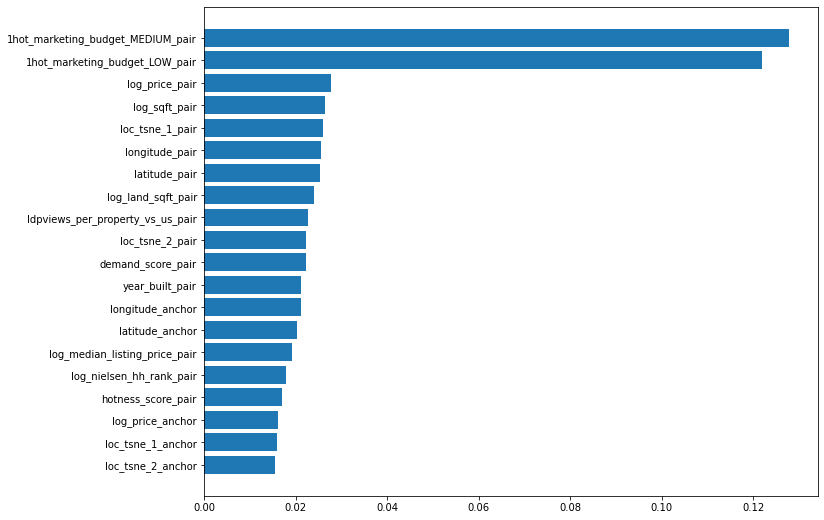

In [9]:
sorted_idx = regressor.feature_importances_.argsort()[-20:]
plt.figure(figsize=(11,9))
plt.barh(positive_pairs_df.drop(['anchor','positive'],axis=1).columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.show()

# User Medians - moving away from listing-listing, to  ip-listing 

In [10]:
# Load in ip, listing data split on temporality

#TRAIN AND TEST ONLY CONTAIN USERS THAT HAVE SEEN AT LEAST 3 LISTINGS
# Separate from co-oc
user_listing_train = pd.read_pickle('ip_listing_temporal_train_full.pkl')
user_listing_test = pd.read_pickle('ip_listing_temporal_test_full.pkl')
listing_data = pd.read_pickle('LOG_siamese_data_11_12.pkl')

In [11]:
# Merge in listing data to replace the rexUrl
train_data = user_listing_train.merge(listing_data,left_on='rexUrl',right_on='rex_url')
train_data.drop(['rexUrl','rex_url'],axis=1,inplace=True)

test_data = user_listing_test.merge(listing_data,left_on='rexUrl',right_on='rex_url')

In [12]:
# Get user house vector by MEDIANING all listings they saw in training
user_averaged_train = train_data.groupby('ip').median()
user_averaged_train.reset_index(inplace=True)

In [13]:
user_averaged_train.head()

,ip,total_baths,stories,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,bedrooms,full_baths,half_baths,year_built,latitude,longitude,is_apt,hotness_score,demand_score,supply_score,ldpviews_per_property_vs_us,loc_tsne_1,loc_tsne_2,1hot_marketing_budget_LOW,1hot_marketing_budget_MEDIUM,1hot_marketing_budget_SURGE,1hot_property_type_CONDO,1hot_property_type_COOP,1hot_property_type_MULTI_FAMILY,1hot_property_type_SINGLE,1hot_property_type_TOWNHOUSE,1hot_pool_spa_types_Community Pool or Spa,1hot_pool_spa_types_Heated Pool,1hot_pool_spa_types_In Ground,1hot_pool_spa_types_No,1hot_pool_spa_types_Pool & Spa (both),1hot_pool_spa_types_Pool (yes),1hot_pool_spa_types_Spa (only),1hot_home_style_Bungalow,1hot_home_style_Cape Cod,1hot_home_style_Contemporary,1hot_home_style_Mediterranean,1hot_home_style_Modern,1hot_home_style_Other,1hot_home_style_Ranch/Rambler,1hot_home_style_Spanish,1hot_home_style_Traditional,1hot_fencing_description_Average Condition,1hot_fencing_description_Back Yard,1hot_fencing_description_Block,1hot_fencing_description_Block Wall,1hot_fencing_description_Chain Link,1hot_fencing_description_Excellent Condition,1hot_fencing_description_Good Condition,1hot_fencing_description_None,1hot_fencing_description_Other,1hot_fencing_description_Other/Remarks,1hot_fencing_description_Partial,1hot_fencing_description_Privacy,1hot_fencing_description_Stucco Wall,1hot_fencing_description_Vinyl,1hot_fencing_description_Wood,1hot_fencing_description_Wrought Iron,1hot_property_condition_Additions/Alter,1hot_property_condition_Additions/Alterations,1hot_property_condition_Building Permit,1hot_property_condition_Fixer,1hot_property_condition_Other,1hot_property_condition_Repairs Cosmetic,1hot_property_condition_Repairs Major,1hot_property_condition_Termite Clearance,1hot_property_condition_Turnkey,1hot_property_condition_Updated/Remodeled,log_price,log_sqft,log_median_listing_price,log_median_days_on_market,log_nielsen_hh_rank,log_land_sqft,log_total_rooms
0,1.129.109.119,2.00,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.919680,81.637776,70.201584,1.66910,7.913253,5.565733,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.244581,7.546446,13.377083,3.688879,7.552237,8.791182,1.945910
1,1.65.170.128,2.00,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1985.0,34.538646,-118.062533,0.0,72.534605,59.756002,54.835673,1.18120,-5.643898,-0.342706,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.701394,7.063048,12.706999,3.871201,7.523481,10.818417,1.609438
2,100.1.126.45,2.00,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1956.0,34.154569,-118.193838,0.0,52.772766,37.673543,70.201584,0.82350,6.102357,-0.162682,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.499429,7.543273,13.710206,3.688879,7.990577,8.745125,1.609438
3,100.1.133.99,3.00,2.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,0.0,1969.5,34.177295,-118.468256,0.0,61.524433,40.038434,83.010432,0.86395,11.042698,-5.345970,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.616137,7.483805,13.946102,3.475407,7.976830,8.727770,1.868835
4,100.11.144.137,2.25,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1972.0,34.155082,-118.341700,0.5,42.995529,29.516040,51.564829,0.71325,3.019464,-1.764573,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.458826,7.41

In [14]:
# user_averaged_train.to_pickle('temporal_train_user_medianed.pkl')

## Match to all observed listings, and predict

In [15]:
# Subset the list of all listings to only ones that have been seen by users (within train or test)
unique_rexurls = list( set(user_listing_train.rexUrl) | set(user_listing_test.rexUrl) )
observed_listings = listing_data[listing_data.rex_url.isin(unique_rexurls)].copy()

In [16]:
user_listing_train.head()

,ip,rexUrl
11,1.129.109.119,15819-golden-lantern-ln
11,1.129.109.119,3332-genoa-pl
11,1.129.109.119,12401-moorpark-st-unit-201-studio-city
65,1.65.170.128,1270-bayport-cir
65,1.65.170.128,656-w-avenue-j8


In [17]:
# Pair each user with every listing
# cross join of user_averaged listings and every other listing
user_averaged_train['key'] = 1
observed_listings['key'] = 1
  
all_pairs = pd.merge(user_averaged_train, observed_listings, on ='key',suffixes=('_train','_test')).drop("key", 1) 

user_averaged_train.drop('key',axis=1,inplace=True)
observed_listings.drop('key',axis=1,inplace=True)

### Removing listings from test set that were already seen by user in train set

In [18]:
seen_joined = all_pairs.merge(user_listing_train,left_on=['ip','rex_url'],right_on=['ip','rexUrl'],how='left')

In [19]:
idx_seen = np.where(seen_joined.rexUrl.notna())[0]

In [20]:
print(len(idx_seen))
print(user_listing_train.shape)

51060
(51060, 2)


In [21]:
all_pairs.drop(index=idx_seen,inplace=True)

In [22]:
# Num Users, listings involved in testing
print('unique ips', all_pairs.ip.nunique())
print('unique rexurls', all_pairs.rex_url.nunique())

unique ips 8663
unique rexurls 466


In [23]:
all_pairs.shape

(3985898, 156)

In [24]:
all_pairs.head()

,ip,total_baths_train,stories_train,has_central_air_train,has_jacuzzi_train,has_pool_train,has_solar_train,has_garage_train,bedrooms_train,full_baths_train,half_baths_train,year_built_train,latitude_train,longitude_train,is_apt_train,hotness_score_train,demand_score_train,supply_score_train,ldpviews_per_property_vs_us_train,loc_tsne_1_train,loc_tsne_2_train,1hot_marketing_budget_LOW_train,1hot_marketing_budget_MEDIUM_train,1hot_marketing_budget_SURGE_train,1hot_property_type_CONDO_train,1hot_property_type_COOP_train,1hot_property_type_MULTI_FAMILY_train,1hot_property_type_SINGLE_train,1hot_property_type_TOWNHOUSE_train,1hot_pool_spa_types_Community Pool or Spa_train,1hot_pool_spa_types_Heated Pool_train,1hot_pool_spa_types_In Ground_train,1hot_pool_spa_types_No_train,1hot_pool_spa_types_Pool & Spa (both)_train,1hot_pool_spa_types_Pool (yes)_train,1hot_pool_spa_types_Spa (only)_train,1hot_home_style_Bungalow_train,1hot_home_style_Cape Cod_train,1hot_home_style_Contemporary_train,1hot_home_style_Mediterranean_train,...,1hot_home_style_Contemporary_test,1hot_home_style_Mediterranean_test,1hot_home_style_Modern_test,1hot_home_style_Other_test,1hot_home_style_Ranch/Rambler_test,1hot_home_style_Spanish_test,1hot_home_style_Traditional_test,1hot_fencing_description_Average Condition_test,1hot_fencing_description_Back Yard_test,1hot_fencing_description_Block_test,1hot_fencing_description_Block Wall_test,1hot_fencing_description_Chain Link_test,1hot_fencing_description_Excellent Condition_test,1hot_fencing_description_Good Condition_test,1hot_fencing_description_None_test,1hot_fencing_description_Other_test,1hot_fencing_description_Other/Remarks_test,1hot_fencing_description_Partial_test,1hot_fencing_description_Privacy_test,1hot_fencing_description_Stucco Wall_test,1hot_fencing_description_Vinyl_test,1hot_fencing_description_Wood_test,1hot_fencing_description_Wrought Iron_test,1hot_property_condition_Additions/Alter_test,1hot_property_condition_Additions/Alterations_test,1hot_property_condition_Building Permit_test,1hot_property_condition_Fixer_test,1hot_property_condition_Other_test,1hot_property_condition_Repairs Cosmetic_test,1hot_property_condition_Repairs Major_test,1hot_property_condition_Termite Clearance_test,1hot_property_condition_Turnkey_test,1hot_property_condition_Updated/Remodeled_test,log_price_test,log_sqft_test,log_median_listing_price_test,log_median_days_on_market_test,log_nielsen_hh_rank_test,log_land_sqft_test,log_total_rooms_test
0,1.129.109.119,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.91968,81.637776,70.201584,1.6691,7.913253,5.565733,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.757776,7.465655,14.400543,3.806662,8.899185,8.919319,1.945910
1,1.129.109.119,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.91968,81.637776,70.201584,1.6691,7.913253,5.565733,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.102161,6.894670,13.444519,3.610918,8.236421,10.887643,1.609438
2,1.129.109.119,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.91968,81.637776,70.201584,1.6691,7.913253,5.565733,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,14.343193,7.210080,15.404756,5.398163,8.734077,10.827885,1.609438
3,1.129.109.119,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.91968,81.637776,70.201584,1.6691,7.913253,5.565733,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.687677,7.403061,14.152019,3.912023,6.937314,8.783856,1.609438
4,1.129.109.119,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1983.0,34.150675,-118.189237,0.0,75.91

In [24]:
# all_pairs.to_csv('user_medianed_paired_unseen.csv')

##### Predicting in chunks for RAM

In [25]:
total_len = all_pairs.shape[0]
preds_list = []
for i in range(10):
  all_pairs_p = all_pairs.iloc[int(i*total_len/10):int((i+1)*total_len/10)].copy()
  preds_list.append(regressor.predict_proba(all_pairs_p.drop(['rex_url','ip'],axis=1)))
  print(all_pairs_p.shape)

(398589, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398589, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398590, 156)


In [26]:
temporal_pred_proba = np.concatenate(preds_list)
temporal_pred_proba.shape

(3985898, 2)

In [27]:
preds_list_binary = []
for i in range(10):
  all_pairs_p = all_pairs.iloc[int(i*total_len/10):int((i+1)*total_len/10)].copy()
  preds_list_binary.append(regressor.predict(all_pairs_p.drop(['rex_url','ip'],axis=1)))
  print(all_pairs_p.shape)

(398589, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398589, 156)
(398590, 156)
(398590, 156)
(398590, 156)
(398590, 156)


In [28]:
temporal_pred = np.concatenate(preds_list_binary)
temporal_pred.shape

(3985898,)

In [29]:
# Create prediction result table
all_pairs_predictions = pd.DataFrame({'ip':all_pairs.ip,'rex_url':all_pairs.rex_url,'proba':temporal_pred_proba[:,1],'pred':temporal_pred})
all_pairs_predictions.sort_values('proba',ascending=False,inplace=True)
all_pairs_predictions.reset_index(drop=True,inplace=True)

In [30]:
all_pairs_predictions.head()

,ip,rex_url,proba,pred
0,172.250.250.240,3332-genoa-pl,1.0,1
1,104.32.67.114,23552-park-south-st,1.0,1
2,47.232.160.28,814-e-graves-ave,1.0,1
3,75.140.9.218,23552-park-south-st,1.0,1
4,96.8.168.117,23552-park-south-st,1.0,1


In [31]:
# all_pairs_predictions.to_pickle('all_pairs_predictions_wdups.pkl')
# all_pairs_predictions.to_pickle('all_pairs_predictions.pkl')

#### Distribution of predictions

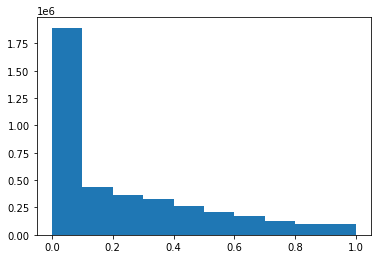

In [32]:
plt.hist(all_pairs_predictions.proba)
plt.show()

### Precision/Recall Calculation

In [33]:
user_listing_test[user_listing_test.ip=='1.129.109.119'].rexUrl.values

array(['22127-buena-ventura-st'], dtype=object)

In [34]:
def precision_recall_at_k(k_in):
  # get top k predictions for each ip
  g = all_pairs_predictions.groupby(['ip']).apply(lambda x: x.sort_values(['proba'], ascending = False)).reset_index(drop=True)
  top_k_each = g.groupby('ip').head(k_in)
  recommended_at_k = top_k_each[top_k_each.pred==1].groupby('ip')['rex_url'].apply(list).reset_index()

  recall_results = {}
  precision_results = {}
  #loop through each ip and compare recommended to real test set
  for idx, row in recommended_at_k.iterrows():
    ip_curr = row['ip']
    recommended_at_k_curr = row['rex_url']

    true_for_ip_curr = user_listing_test[user_listing_test.ip==ip_curr].rexUrl.values

    # Recommendations that are relevant
    # find overlap
    correctly_found_ip_curr = list(set(recommended_at_k_curr) & set(true_for_ip_curr))


    recall_results[ip_curr] = len(correctly_found_ip_curr)/len(true_for_ip_curr)
    precision_results[ip_curr] = len(correctly_found_ip_curr)/len(recommended_at_k_curr)

  
  return recommended_at_k, recall_results, precision_results


10

In [35]:
recommended_at_10, recall_at_10, precision_at_10 = precision_recall_at_k(10)

In [56]:
print('precision@10: ', np.round(100*np.mean(list(precision_at_10.values())),2), '%')
print('recall@10: ', np.round(100*np.mean(list(recall_at_10.values())),2), '%')

precision@10:  4.24 %
recall@10:  24.7 %


20

In [37]:
recommended_at_20, recall_at_20, precision_at_20 = precision_recall_at_k(20)

In [57]:
print('precision@20: ', np.round(100*np.mean(list(precision_at_20.values())),2), '%')
print('recall@20: ', np.round(100*np.mean(list(recall_at_20.values())),2), '%')

precision@20:  3.18 %
recall@20:  36.64 %


30

In [39]:
recommended_at_30, recall_at_30, precision_at_30 = precision_recall_at_k(30)

In [58]:
print('precision@30: ', np.round(100*np.mean(list(precision_at_30.values())),2), '%')
print('recall@30: ', np.round(100*np.mean(list(recall_at_30.values())),2), '%')

precision@30:  2.75 %
recall@30:  46.77 %


ALL

In [41]:
recommended_at_all, recall_at_all, precision_at_all = precision_recall_at_k(9999999)

In [59]:
print('precision overall: ', np.round(100*np.mean(list(precision_at_all.values())),2), '%')
print('recall overall: ', np.round(100*np.mean(list(recall_at_all.values())),2), '%')

precision overall:  1.67 %
recall overall:  71.35 %


### Example Case

In [43]:
train_la = pd.read_pickle("ip_listing_temporal_train_full.pkl")
test_la = pd.read_pickle("ip_listing_temporal_test_full.pkl")

In [44]:
cols = ['rex_url','sqft','price','bedrooms','total_rooms','full_baths','is_apt']

In [45]:
iptest = '104.173.187.33'
# iptest = '100.11.168.44'	
preds_for_ip_curr = all_pairs_predictions[(all_pairs_predictions.ip==iptest)].copy()
#Rank the predictions for that user
preds_for_ip_curr['rank'] = preds_for_ip_curr['proba'].rank(method='dense',ascending=False)

#Get top k predictions for that user
top_k_for_ip_curr = preds_for_ip_curr[preds_for_ip_curr['rank']<=10.0]
# Recommended items
recommended_at_k = top_k_for_ip_curr[top_k_for_ip_curr.pred==1].rex_url.values

In [46]:
recommended_at_k

array(['23552-park-south-st', '1453-eagle-park-rd-apt-207',
       '1415-n-myers-st', '814-e-graves-ave', '6345-colbath-ave',
       '6954-rubio-ave', '14919-cadillac-ct', '3332-genoa-pl',
       '22718-figueroa-st-unit-21', '1509-inverness-dr'], dtype=object)

In [47]:
training_case = train_la[train_la.ip==iptest].merge(listing_data,left_on='rexUrl',right_on='rex_url',how='left')
training_case['sqft'] = np.exp(training_case['log_sqft']).map('{:,.0f}'.format)
training_case['price'] = np.exp(training_case['log_price']).map('{:,.0f}'.format)
training_case['total_rooms'] = np.exp(training_case['log_total_rooms'])

In [48]:
training_case[cols]

,rex_url,sqft,price,bedrooms,total_rooms,full_baths,is_apt
0,13514-chivers-ave,"1,736","630,000",4.0,7.0,2.0,0.0
1,9735-baden-ave,"7,825","2,000,000",7.0,7.0,5.0,0.0
2,656-w-avenue-j8,768,"219,000",2.0,3.0,1.0,0.0
3,19970-e-limecrest-dr,"2,364","950,000",3.0,8.0,3.0,0.0
4,3501-knoll-crest-ave,"2,504","1,290,000",3.0,8.0,3.0,0.0
5,12750-centralia-st-unit-103,844,"312,900",1.0,3.0,1.0,1.0
6,6210-s-van-ness-ave,"1,448","515,000",3.0,6.0,2.0,0.0


In [49]:
testing_case = test_la[test_la.ip==iptest].merge(listing_data,left_on='rexUrl',right_on='rex_url',how='left')
testing_case['sqft'] = np.exp(testing_case['log_sqft']).map('{:,.0f}'.format)
testing_case['price'] = np.exp(testing_case['log_price']).map('{:,.0f}'.format)
testing_case['total_rooms'] = np.exp(testing_case['log_total_rooms'])

In [50]:
testing_case[cols]

,rex_url,sqft,price,bedrooms,total_rooms,full_baths,is_apt
0,22718-figueroa-st-unit-21,"1,367","433,000",4.0,5.0,2.0,1.0
1,3591-soledad-canyon-rd,"1,680","575,000",3.0,7.0,2.0,0.0
2,6345-colbath-ave,"1,633","779,000",3.0,7.0,2.0,0.0


In [51]:
toprecs_case = pd.DataFrame({'rexUrl':recommended_at_k})
toprecs_case = toprecs_case.merge(listing_data,left_on='rexUrl',right_on='rex_url',how='left')
toprecs_case['sqft'] = np.exp(toprecs_case['log_sqft']).map('{:,.0f}'.format)
toprecs_case['price'] = np.exp(toprecs_case['log_price']).map('{:,.0f}'.format)
toprecs_case['total_rooms'] = np.exp(toprecs_case['log_total_rooms'])

In [52]:
toprecs_case[cols]

,rex_url,sqft,price,bedrooms,total_rooms,full_baths,is_apt
0,23552-park-south-st,"5,910","2,999,999",5.0,8.0,5.0,0.0
1,1453-eagle-park-rd-apt-207,"1,005","350,000",2.0,4.0,2.0,1.0
2,1415-n-myers-st,"1,782","840,000",5.0,5.0,3.0,0.0
3,814-e-graves-ave,"1,126","635,000",3.0,7.0,2.0,0.0
4,6345-colbath-ave,"1,633","779,000",3.0,7.0,2.0,0.0
5,6954-rubio-ave,"2,033","895,000",4.0,6.0,3.0,0.0
6,14919-cadillac-ct,"2,316","669,000",4.0,7.0,3.0,0.0
7,3332-genoa-pl,"3,163","491,837",5.0,10.0,3.0,0.0
8,22718-figueroa-st-unit-21,"1,367","433,000",4.0,5.0,2.0,1.0
9,1509-inverness-dr,"3,244","2,525,000",4.0,8.0,2.0,0.0


In [ ]:
# predcur = all_pairs_predictions[(all_pairs_predictions.ip==iptest)].values[:,1]
# [np.argwhere(predcur==i)[0][0] for i in user_listing_test[user_listing_test.ip==iptest].rexUrl.values]

[175, 209]